<a href="https://colab.research.google.com/github/radr44/Iterative_Convolutional_Neural_Network/blob/master/checkpoints/subsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 as cv
import torch
import numpy as np
import pywt

In [0]:
imgg=cv.imread('frama_683019_d.png')
pic=cv.imread('frame_00_04_0012.png')
from google.colab.patches import cv_imshow

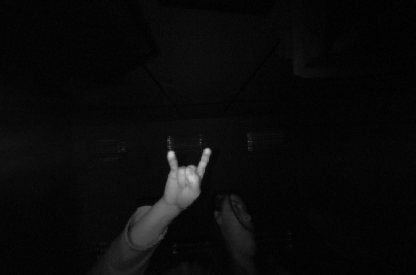

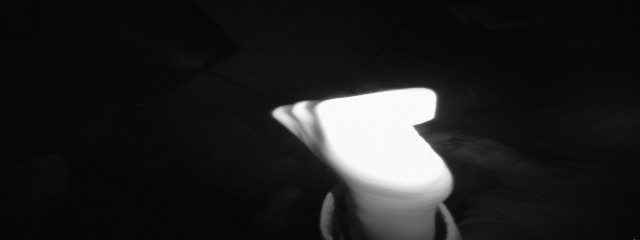

In [0]:
cv_imshow(imgg)
cv_imshow(pic)

In [0]:
def Gaussian_downscale(img):
  '''Gaussian downscale subsampling for a numpy array'''
  ss = cv.pyrDown(img)
  return ss

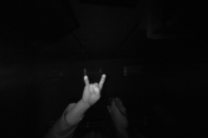

In [0]:
cv_imshow(Gaussian_downscale(imgg))

In [0]:
def CannyEdge(img, l_bound = 20, u_bound = 200):
  img=(img).astype(np.uint8)
  img = cv.resize(img, None, fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC )
  ss = edge=cv.Canny(img, l_bound, u_bound)
  cv_imshow(img)
  cv_imshow(ss)
  return ss

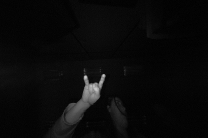

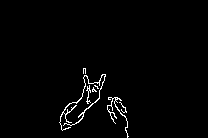

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
CannyEdge(imgk,20,150)

In [0]:
def hfilter(img, blur = True, ker = 3):
  ddepth = cv.CV_16S
  scale = 1
  delta = 0
  img = cv.resize(img, None, fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC )
  if blur==True:
    img = cv.GaussianBlur(img, (3, 3), 0)
  grad_x = cv.Sobel(img, ddepth, 1, 0, ksize=ker, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
  abs_grad_x = cv.convertScaleAbs(grad_x)
  return abs_grad_x

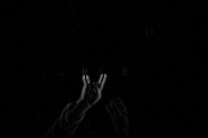

In [0]:
cv_imshow(hfilter(imgg,ker=1))

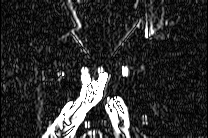

In [0]:
cv_imshow(hfilter(imgg,False,ker=5))

In [0]:
def vfilter(img, blur = True, ker = 3):
  ddepth = cv.CV_16S
  scale = 1
  delta = 0
  img = cv.resize(img, None, fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC )
  if blur==True:
    img = cv.GaussianBlur(img, (3, 3), 0)
  grad_y = cv.Sobel(img, ddepth, 0, 1, ksize=ker, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
  abs_grad_y = cv.convertScaleAbs(grad_y)
  return abs_grad_y

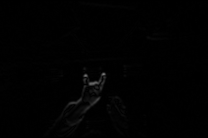

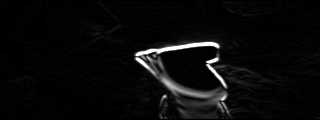

In [0]:
cv_imshow(vfilter(imgg,ker=1))
cv_imshow(vfilter(pic))

In [0]:
def wfilter(img, blur = True, ker = 3):
  ddepth = cv.CV_16S
  scale = 1
  delta = 0
  img = cv.resize(img, None, fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC )
  if blur==True:
    img = cv.GaussianBlur(img, (3, 3), 0)
  grad_y = cv.Sobel(img, ddepth, 0, 1, ksize=ker, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
  abs_grad_y = cv.convertScaleAbs(grad_y)
  grad_x = cv.Sobel(img, ddepth, 1, 0, ksize=ker, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
  abs_grad_x = cv.convertScaleAbs(grad_x)
  grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
  return grad

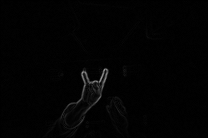

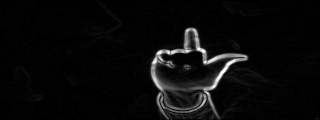

In [0]:
cv_imshow(wfilter(pic,False,ker=1))
cv_imshow(wfilter(pic))

In [0]:
def Laplacian(img, blur = True, ker = 3 ):
  ddepth = cv.CV_16S
  img = cv.resize(img, None, fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC )
  if blur==True:
    img = cv.GaussianBlur(img, (3, 3), 0)
  ss = cv.Laplacian(img, ddepth, ksize=ker)
  return ss

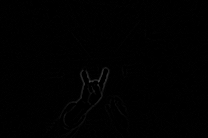

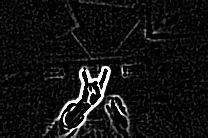

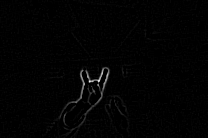

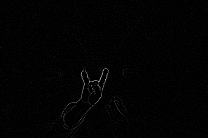

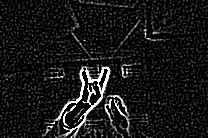

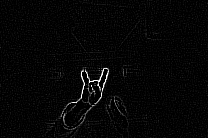

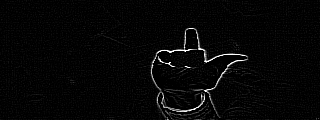

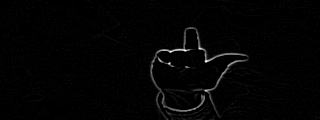

In [0]:
cv_imshow(Laplacian(imgg,ker=1))
cv_imshow(Laplacian(imgg,ker=5))
cv_imshow(Laplacian(imgg))
cv_imshow(Laplacian(imgg,ker=1,blur=False))
cv_imshow(Laplacian(imgg,ker=5,blur=False))
cv_imshow(Laplacian(imgg,blur=False))
cv_imshow(Laplacian(pic,blur=False))
cv_imshow(Laplacian(pic))

In [0]:
imgk=imgg+0.2